File created by Jinghao Chen (jinghc2@uci.edu).

Import necessary packages.

In [1]:
import pickle
import torch
import mptools as mp
import numpy as np
np.random.seed(114514)

Load combined data from repository "/data".

In [2]:
pickle_in = open("data/data_comb.pkl","rb")
data_comb = pickle.load(pickle_in)

Calculate necessary values.

In [3]:
N_comb = data_comb.shape[1]

In [4]:
N_theta = 4+N_comb-1 # the number of unknown parameters

Initialize $\theta$.

In [5]:
theta_ini = np.array([0.5,0.06,0.5,-3.26]+[0]*(N_comb-1)).reshape(N_theta,1) # + 0.1*np.random.randn(N_theta,1)

Shuffle and binary classified data.

In [6]:
X, Y = data_comb[:,:-1], data_comb[:,-1]   # get features & target
X, Y = mp.shuffleData(X,Y)       # reorder randomly rather than by class label

In [7]:
Xtr, Ytr = X[Y!=5,:], Y[Y!=5]
Ytr = np.heaviside(Ytr-5,-1)

Train the classifier to jointly learn $\theta$.

KeyboardInterrupt: 

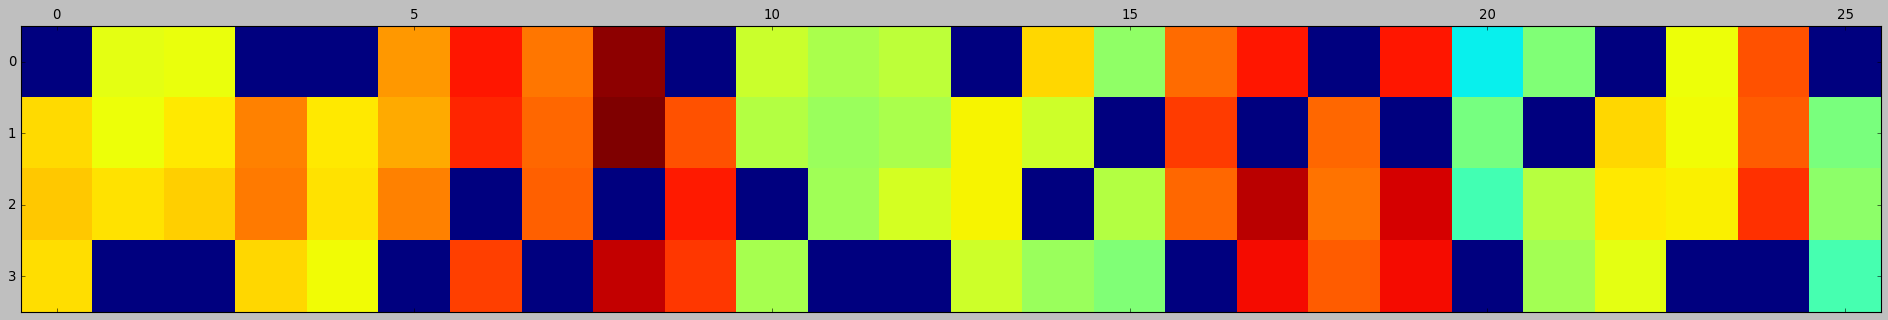

In [8]:
learner = mp.visMatrix()
learner.classes = np.unique(Ytr)
learner.theta = torch.tensor(theta_ini,requires_grad = True,dtype=torch.float32) # TODO
learner.train(Xtr,Ytr,initStep=2e-1,stopTol=1e-4,stopEpochs=50,alpha=10);